> 说明：Python最好的学习就是实战
中午给好基友打电话，他说在睡午觉，我很惊讶，为啥一向热爱操盘的他今天居然不操作，他说周五他都一般不操盘，因为周末要面临的不确定性太多，所以周五不买。
好像很有道理的样子，那么就用数据说话吧。


# 项目说明
**项目目标：**想知道历史上是否A股真的存在所谓的：周末效应，并画图展示

**项目步骤：**
1. 从开源API-[opendatatools](https://github.com/PKUJohnson/OpenData)中获取沪深300列表
2. 获取沪深300日度交易信息
3. 整理数据获得每周分星期成交量的均值、中位数
4. 整理数据获得每周分星期股票价格的均值、中位数
5. 可视化

# 从opendatatools中获取沪深300数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from opendatatools import stock  #如果没装opendatatools，请使用pip install opendatatools安装
%matplotlib inline

In [2]:
df, msg = stock.get_daily('000300.SH', start_date='2005-04-08', end_date='2018-07-10')

In [3]:
df.set_index('time',drop=False, inplace=True)
df.head(10)

,change,high,last,low,open,percent,symbol,time,turnover_rate,volume
time,,,,,,,,,,
2005-04-08,18.712,1003.699,1003.445,979.529,984.665,1.90,000300.SH,2005-04-08,0.0,1476252600
2005-04-11,-8.024,1008.735,995.421,992.773,1003.879,-0.80,000300.SH,2005-04-11,0.0,1593606600
2005-04-12,-16.724,993.711,978.697,978.204,993.711,-1.68,000300.SH,2005-04-12,0.0,1022619300
2005-04-13,22.203,1006.499,1000.900,987.950,987.950,2.27,000300.SH,2005-04-13,0.0,1607168700
2005-04-14,-13.925,1006.416,986.975,985.578,1004.640,-1.39,000300.SH,2005-04-14,0.0,1294571000
2005-04-15,-12.893,982.613,974.082,971.930,982.613,-1.31,000300.SH,2005-04-15,0.0,1040895500
2005-04-18,-10.310,970.907,963.772,958.649,970.907,-1.06,000300.SH,2005-04-18,0.0,859840000
2005-04-19,2.114,968.867,965.886,957.910,962.916,0.22,000300.SH,2005-04-19,0.0,921262300
2005-04-20,-15.019,964.151,950.867,946.197,964.151,-1.55,000300.SH,2005-04-20,0.0,885070500


In [5]:
#存一份小一点的数据集hs，只保留需要的变量
hs = df.copy()
hs = hs.loc[:,['change','volume']]
hs.head(10)

,change,volume
time,,
2005-04-08,18.712,1476252600
2005-04-11,-8.024,1593606600
2005-04-12,-16.724,1022619300
2005-04-13,22.203,1607168700
2005-04-14,-13.925,1294571000
2005-04-15,-12.893,1040895500
2005-04-18,-10.310,859840000
2005-04-19,2.114,921262300
2005-04-20,-15.019,885070500


In [20]:
hs['time'] = pd.to_datetime(hs.index.values)
hs['weekday'] = hs['time'].apply(lambda time:time.weekday())

In [21]:
hs.head(10)

,change,volume,time,weekday
time,,,,
2005-04-08,18.712,1476252600,2005-04-08,4
2005-04-11,-8.024,1593606600,2005-04-11,0
2005-04-12,-16.724,1022619300,2005-04-12,1
2005-04-13,22.203,1607168700,2005-04-13,2
2005-04-14,-13.925,1294571000,2005-04-14,3
2005-04-15,-12.893,1040895500,2005-04-15,4
2005-04-18,-10.310,859840000,2005-04-18,0
2005-04-19,2.114,921262300,2005-04-19,1
2005-04-20,-15.019,885070500,2005-04-20,2


# 整理需要的数据
## 生成交易量的统计数据

In [25]:
hs_group_mean = hs.groupby('weekday' ,as_index=False).mean()
hs_group_mean['volume'] = hs_group_mean['volume']/1000000000
hs_group_mean.head(10)

,weekday,change,volume
0,0,4.786830,9.064789
1,1,-1.328495,8.966920
2,2,2.149999,8.830360
3,3,-3.487477,8.629473
4,4,1.831627,8.482692


In [26]:
hs_group_median = hs.groupby('weekday' ,as_index=False).median()
hs_group_median['volume'] = hs_group_median['volume']/1000000000
hs_group_median.head(10)

,weekday,change,volume
0,0,6.4500,6.853434
1,1,3.2980,6.821813
2,2,1.7915,6.829833
3,3,-1.9790,6.660366
4,4,3.0665,6.419361


# 可视化

In [36]:
week_list = ['星期一','星期二','星期三','星期四','星期五']
hs_group_mean['weekday_name'] = week_list
hs_group_mean.head(10)

,weekday,change,volume,weekday_name
0,0,4.786830,9.064789,星期一
1,1,-1.328495,8.966920,星期二
2,2,2.149999,8.830360,星期三
3,3,-3.487477,8.629473,星期四
4,4,1.831627,8.482692,星期五


In [56]:
def bar_fig(df ,var):
    fig_x1 = df['weekday_name']
    fig_y1 = df[var].apply(lambda x:round(x,2))
    ## 定义一下中文乱码问题
    plt.rcParams['font.sans-serif'] = 'simhei'
    ## 定义一下画图的风格
    plt.style.use('seaborn-pastel')
    ## 定义一下画图的大小
    f , ax=plt.subplots(figsize=(14,6))
    ## 第一个图形
    rect = plt.bar(fig_x1, fig_y1, align = 'center',
                   color=['purple','r','r','r','purple'], 
                   alpha = 0.8,label =var)

    ## 标注一下数字
    for rec in rect:
        x=rec.get_x()
        height=rec.get_height()
        plt.text(x+0.3,1.02*height,str(height))
    ## X轴的显示问题
    plt.xticks(fig_x1)
    ## legend的位置
    plt.legend(loc=1)
    plt.title("以沪深300为例，是否真的存在周末效应")

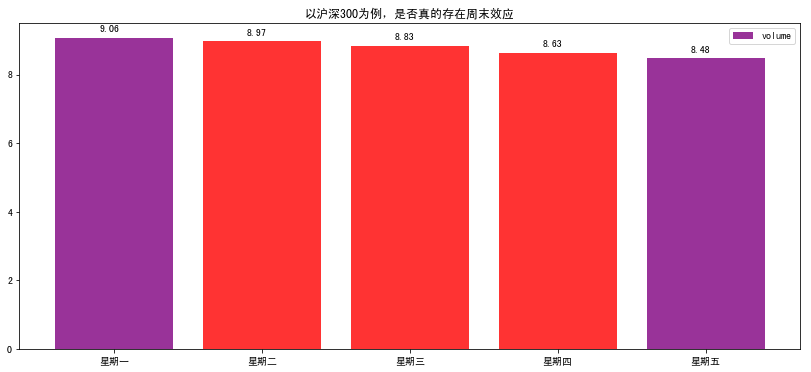

In [57]:
#交易量
bar_fig(hs_group_mean ,'volume')

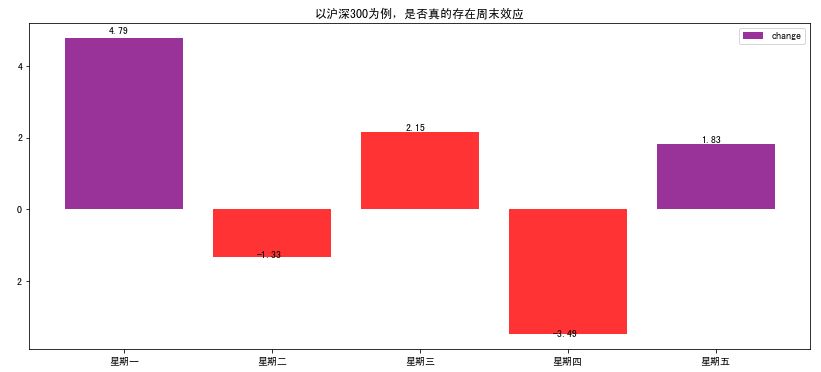

In [58]:
#收益率
bar_fig(hs_group_mean ,'change')

# 研究结论
+ 从历史数据来看，周五交易量确实是整个星期最低的，而周一也是整个星期最高的一天，周五平均而言比周一低了6.83%
+ 从收益率上来说，周一的收益率最好，周四最差